In [41]:
# Loading IRIS dataset
from sklearn.datasets import load_iris
# Module
to allow splitting training and testing data
from sklearn.model_selection import train_test_split
# Gaussian Scaler
from sklearn.naive_bayes import GaussianNB
# Performance metrics for the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Loading dataset

In [24]:
# Loading Dataset

# X values are the features
# Y values are the outcomes
X,y = load_iris(return_X_y=True)

In [31]:
# Printing features
print('Features')
print(X)

# Printing outcomes
print('\nOutcomes')
print(y)

Features
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

## Based on the outcomes, I can see we are dealing with a multi classification problem

# Splitting training and testing data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Creating the model

In [33]:
gnb=GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

# Testing the model

In [34]:
y_pred = gnb.predict(X_test)

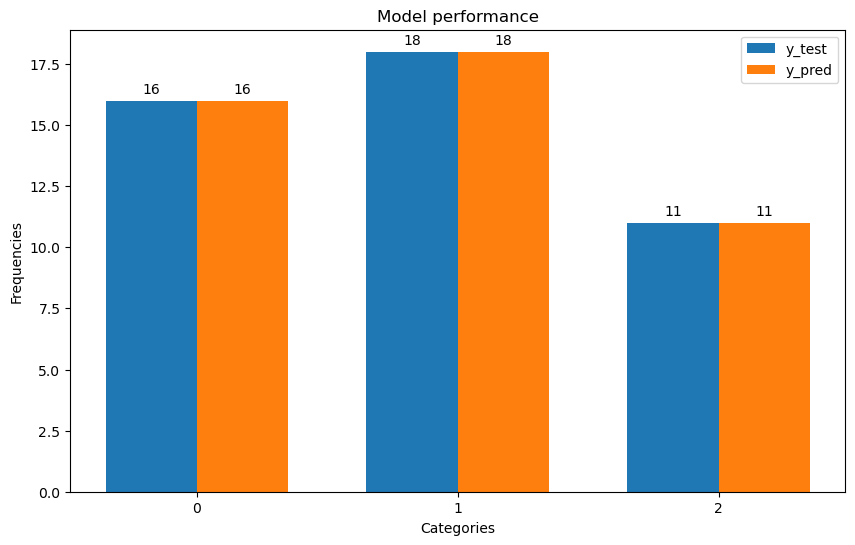

In [43]:
# Getting categories or labels
categories = np.unique(y_test)

# Counting occurrences in y_test and y_pred
y_test_counts = np.array([(y_test == cat).sum() for cat in categories])
y_pred_counts = np.array([(y_pred == cat).sum() for cat in categories])

# We put the categories on the X axis
x = np.arange(len(categories))
# Bar's width
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, y_test_counts, width, label='y_test')
bars2 = ax.bar(x + width/2, y_pred_counts, width, label='y_pred')

# Add labels to the chart
ax.set_xlabel('Categories')
ax.set_ylabel('Frequencies')
ax.set_title('Model performance')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add labels at the top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.show()

# Evaluating the model

## Confusion Matrix

In [44]:
confusion_matrix(y_pred, y_test)

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 11]])

## Accuracy Score

In [45]:
accuracy_score(y_pred, y_test)

1.0

## Classification Report

In [47]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Homework

Use the 'tips' dataset and try to predict the followins:
1. Is the person smoker or not?
2. Classify time (Dinner, Lunch, etc)

In [49]:
sns.load_dataset('tips')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
